In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

confirmed_df = pd.read_csv("../data/covid-19/time_series_covid19_confirmed_global.csv")
print(confirmed_df.head())


  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...   19551   20342   20917   21459    22142   
1        0        0        0  ...    1232    1246    1263    1299     1341   
2        0        0        0  ...   10050   10154   10265   10382    10484   
3        0        0        0  ...     852     852     852     852      852   
4        0        0        0  ...      88      91      92      96      113   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleyelim
confirmed_df = pd.read_csv("../data/covid-19/time_series_covid19_confirmed_global.csv")

# İlk birkaç satırı görelim
print(confirmed_df.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...   19551   20342   20917   21459    22142   
1        0        0        0  ...    1232    1246    1263    1299     1341   
2        0        0        0  ...   10050   10154   10265   10382    10484   
3        0        0        0  ...     852     852     852     852      852   
4        0        0        0  ...      88      91      92      96      113   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0

In [29]:
# Tarih sütunları hariç ilk 4 sütunu ayıralım (ülke adı, vb.)
date_columns = confirmed_df.columns[4:]  # Tarih sütunları

# Tarihleri datetime formatına dönüştürelim
date_columns = pd.to_datetime(date_columns)

# Şimdi, confirmed_df.columns'ı doğru şekilde ayarlayalım
confirmed_df.columns = list(confirmed_df.columns[:4]) + list(date_columns)

# Ülke bazında toplam vaka sayılarını alalım
confirmed_df = confirmed_df.groupby("Country/Region").sum()

# NaN değerleri sıfır ile dolduralım
confirmed_df = confirmed_df.fillna(0)


C:\Users\user\AppData\Local\Temp\ipykernel_16232\642573323.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = pd.to_datetime(date_columns)


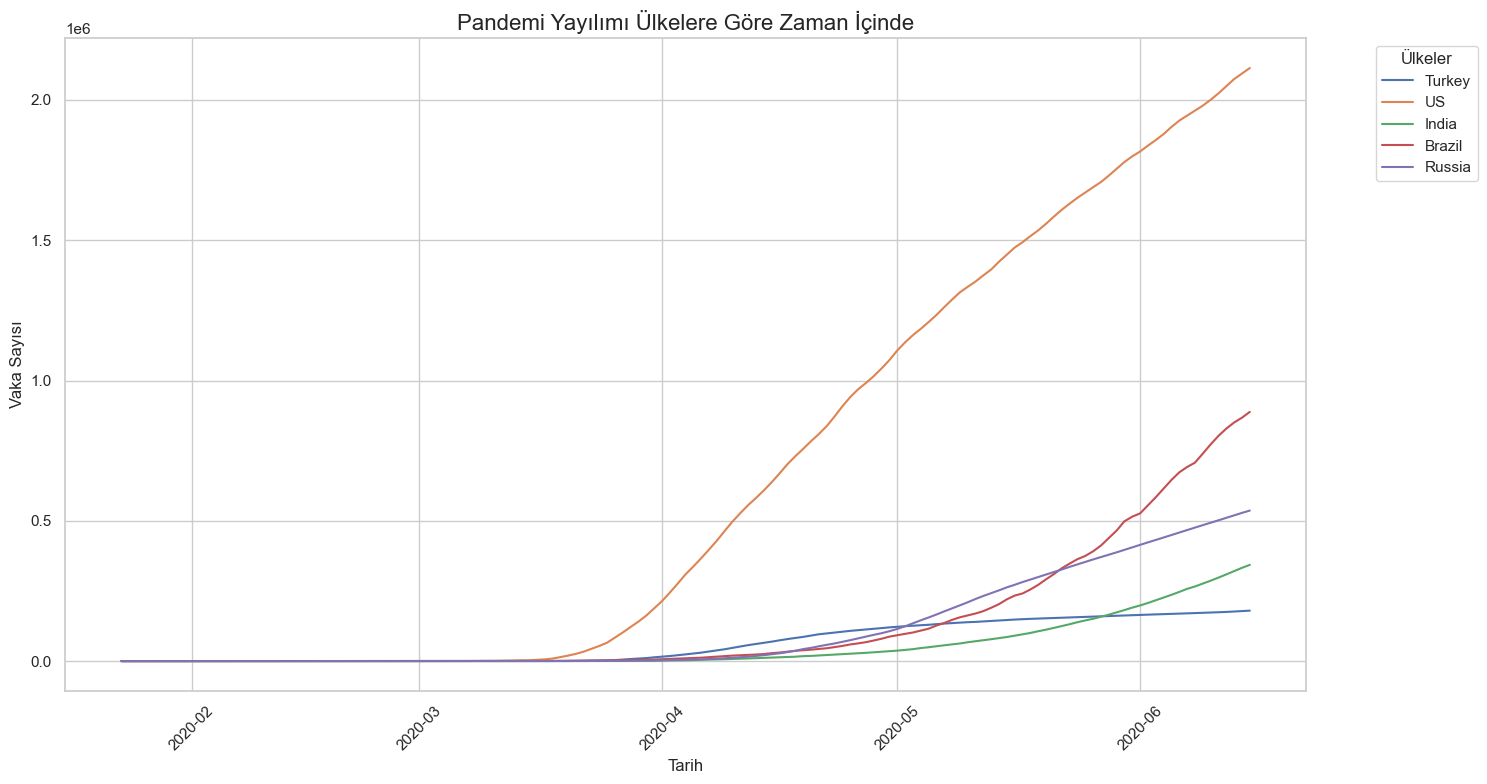

In [30]:

# Grafik tasarımı için seaborn stilini kullanalım
sns.set(style="whitegrid")

# Grafik boyutunu belirleyelim
plt.figure(figsize=(15, 8))

# Burada sadece birkaç ülkeyi çizmeyi deneyelim (örneğin, Türkiye ve ABD)
countries_to_plot = ["Turkey", "US", "India", "Brazil", "Russia"]

# Ortak tarihleri belirleyelim
common_dates = confirmed_df.columns[4:]  # Ortak tarih sütunlarını alalım

# Grafik için her bir ülke için çizim yapalım
# Her ülke için döngü oluşturalım

for country in countries_to_plot:
    if country in confirmed_df.index:
        # Yalnızca ortak tarihlerdeki verileri kullanarak çizim yapalım
        y_values = confirmed_df.loc[country, common_dates].values
        plt.plot(common_dates, y_values, label=country)
    else:
        print(f"Veri bulunamadı: {country}")

# Başlık ve etiketler
plt.title('Pandemi Yayılımı Ülkelere Göre Zaman İçinde', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Vaka Sayısı', fontsize=12)

# Renkli bir grafik için legen (açıklama) ekleyelim
plt.legend(title="Ülkeler", bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafik düzenlemeleri ve gösterme
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
confirmed_df = confirmed_df.groupby("Country/Region").sum()


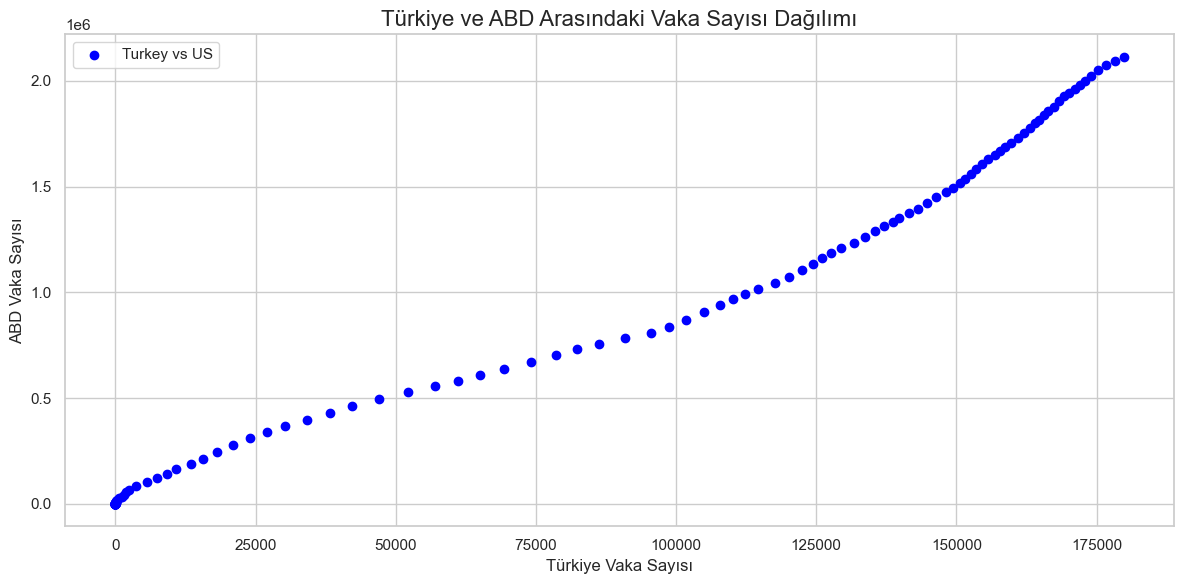

In [ ]:
# Gereksiz 'Lat' ve 'Long' sütunlarını düşelim
confirmed_df = confirmed_df.drop(columns=["Lat", "Long"], errors="ignore")

# NaN değerleri sıfıra çevirelim
confirmed_df = confirmed_df.fillna(0)

# Ortak tarih sütunlarını belirleyelim
date_columns = confirmed_df.columns  # Zaten tarih formatında

# Seaborn stilini açalım
sns.set(style="whitegrid")
# ------------------------------
# 2) DAĞILIM GRAFİĞİ (Scatter Plot)
# ------------------------------
plt.figure(figsize=(12, 6))

# Türkiye ve ABD verileri varsa scatter plot çiz
if "Turkey" in confirmed_df.index and "US" in confirmed_df.index:
    x = confirmed_df.loc["Turkey", date_columns]
    y = confirmed_df.loc["US", date_columns]
    
    # Uzunluklar aynı mı kontrol edelim
    if len(x) == len(y):
        plt.scatter(x, y, color='blue', label='Turkey vs US')
        plt.title('Türkiye ve ABD Arasındaki Vaka Sayısı Dağılımı', fontsize=16)
        plt.xlabel('Türkiye Vaka Sayısı', fontsize=12)
        plt.ylabel('ABD Vaka Sayısı', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Uzunluklar eşleşmiyor, scatter plot çizilemedi.")
else:
    print("Veriler eksik: 'Turkey' veya 'US' verisi yok.")


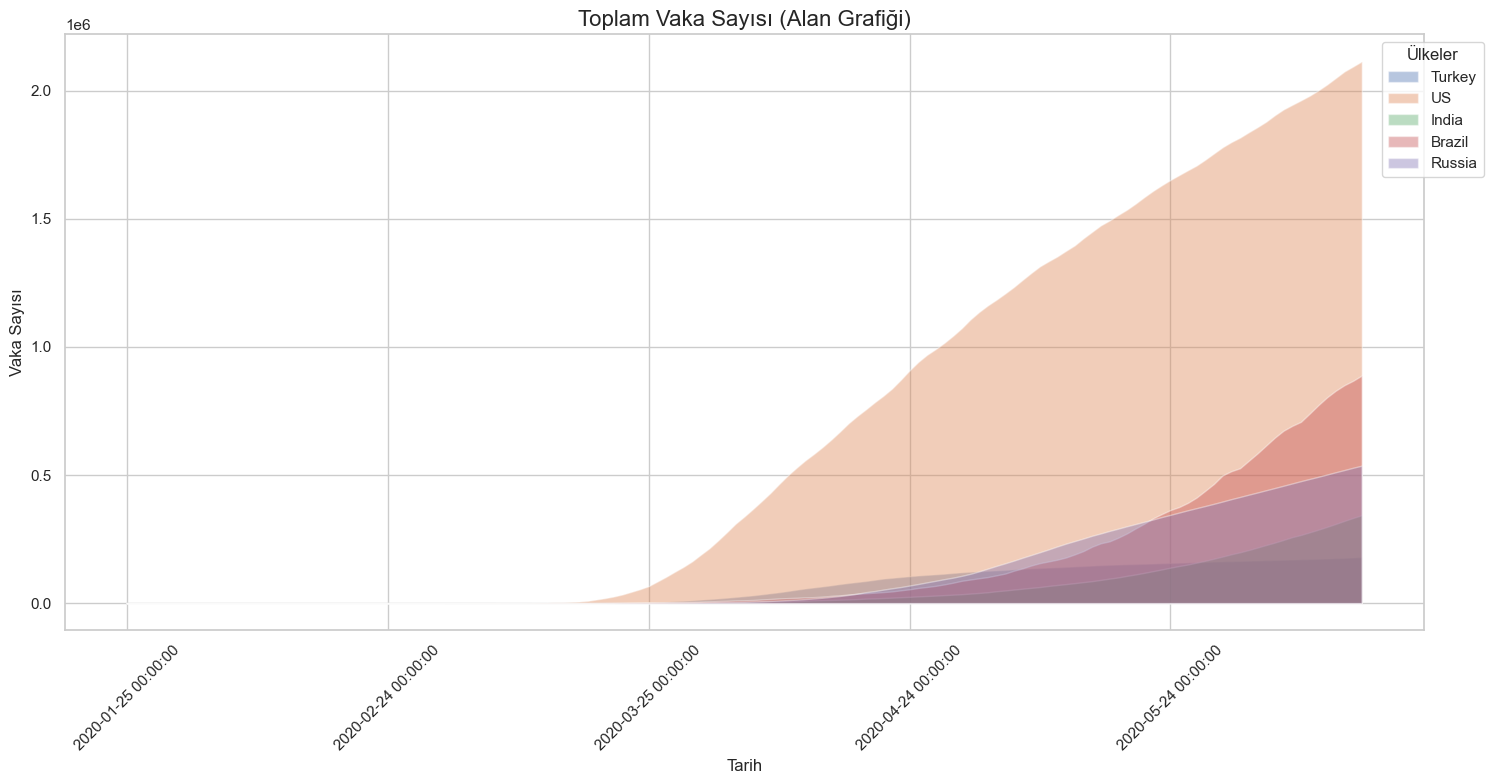

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Eğer daha önce yapılmadıysa sütunları ayır ve gruplandır
date_columns = confirmed_df.columns[4:]  # İlk 4 sütun dışındaki tarih sütunları

# Ülke bazında toplamları al 
# confirmed_df = confirmed_df.groupby("Country/Region").sum()
# confirmed_df = confirmed_df.fillna(0)

# Grafik stili
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Görselleştirilecek ülkeler
countries_to_plot = ["Turkey", "US", "India", "Brazil", "Russia"]

# Alan grafiği çizimi
for country in countries_to_plot:
    if country in confirmed_df.index:
        y_values = confirmed_df.loc[country, date_columns].values
        # Sayıya çevir ve NaN'leri sıfıra çevir
        y_values = pd.to_numeric(y_values, errors="coerce").astype(float)
        y_values = pd.Series(y_values).fillna(0).values

        # X ekseni olarak indeksleri kullanalım
        x_values = range(len(date_columns))

        plt.fill_between(x_values, y_values, alpha=0.4, label=country)
    else:
        print(f"Veri bulunamadı: {country}")

# X eksenine tarihleri etiket olarak yazalım (her 30 günde bir)
plt.xticks(ticks=range(0, len(date_columns), 30), labels=date_columns[::30], rotation=45)

# Başlık ve etiketler
plt.title("Toplam Vaka Sayısı (Alan Grafiği)", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Vaka Sayısı", fontsize=12)
plt.legend(title="Ülkeler", bbox_to_anchor=(1.05, 1), loc='upper right')

plt.tight_layout()
plt.show()


Türkiye ve ABD için R_t Grafiği

C:\Users\user\AppData\Local\Temp\ipykernel_16232\91415652.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_df.index = pd.to_datetime(confirmed_df.index)


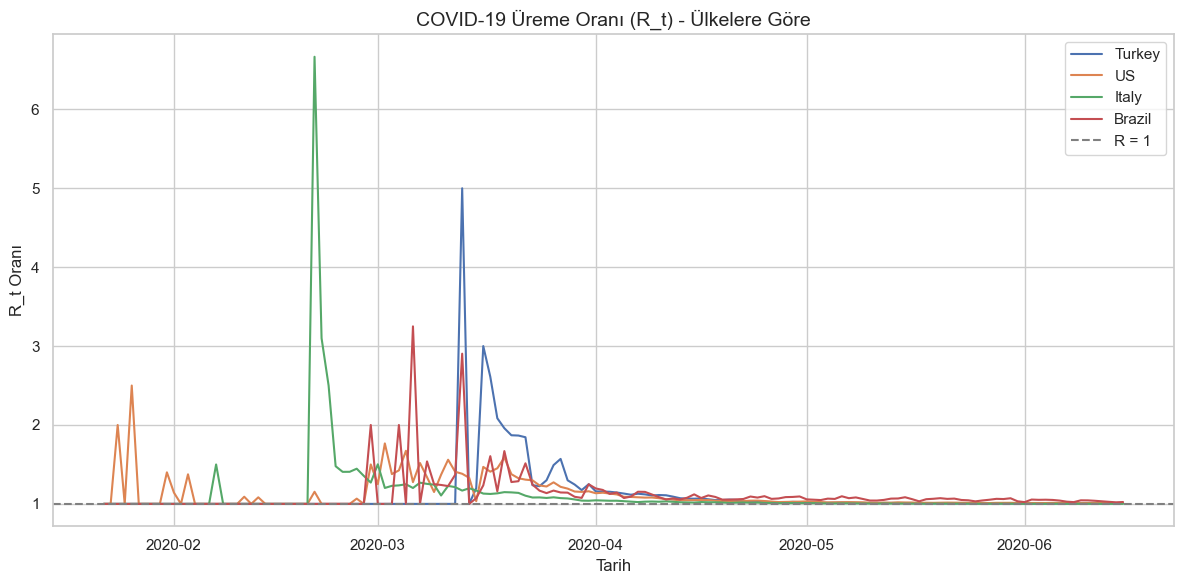

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosya yolu
infected_dataset_url = "../data/covid-19/time_series_covid19_confirmed_global.csv"

# Veriyi oku
confirmed_df = pd.read_csv(infected_dataset_url)

# Ülkelere göre grupla (Province/State'leri birleştir)
confirmed_df = confirmed_df.groupby("Country/Region").sum(numeric_only=True)

# Lat ve Long sütunlarını sil (hala varsa)
confirmed_df = confirmed_df.drop(columns=[col for col in ['Lat', 'Long'] if col in confirmed_df.columns])

# Transpose: Tarihleri index yap
#.T ile sütunları ve satırları yer değiştirir.
#Artık satırlarda tarihler, sütunlarda ülkeler var.
confirmed_df = confirmed_df.T
confirmed_df.index = pd.to_datetime(confirmed_df.index)

# Üreme oranı hesapla (kabaca: güncel vaka / bir gün önceki vaka)
reproduction_rate = confirmed_df.pct_change().replace([float('inf'), -float('inf')], 0).fillna(0) + 1
#pct_change(): Bir önceki güne göre yüzde değişimi hesaplar → bu oran Rₜ'yi yaklaşık gösterir.
#replace(...): Sonsuz (∞) değerleri sıfıra çevirir.
#fillna(0): Eksik değerleri sıfıra çevirir.
#+ 1: Çünkü Rₜ = 1 + yüzde değişim gibi düşünebiliriz


# Bazı ülkeleri çizdirelim
countries = ["Turkey", "US", "Italy", "Brazil"]
plt.figure(figsize=(12, 6))

for country in countries:
    if country in reproduction_rate.columns:
        plt.plot(reproduction_rate.index, reproduction_rate[country], label=country)

plt.title("COVID-19 Üreme Oranı (R_t) - Ülkelere Göre", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("R_t Oranı")
plt.axhline(y=1.0, color='gray', linestyle='--', label="R = 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Rₜ > 1: Her hasta, 1’den fazla kişiye bulaştırıyor → salgın büyür.
#Rₜ < 1: Salgın kontrol altında → yayılma azalır.

Deaths vs Recoveries korelasyon

C:\Users\user\AppData\Local\Temp\ipykernel_16232\3411680190.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_df.index = pd.to_datetime(deaths_df.index)
C:\Users\user\AppData\Local\Temp\ipykernel_16232\3411680190.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_df.index = pd.to_datetime(recovered_df.index)


Korelasyon Değerleri:
Country/Region
Turkey    0.974728
US        0.995048
Brazil    0.963411
India     0.997932
dtype: float64


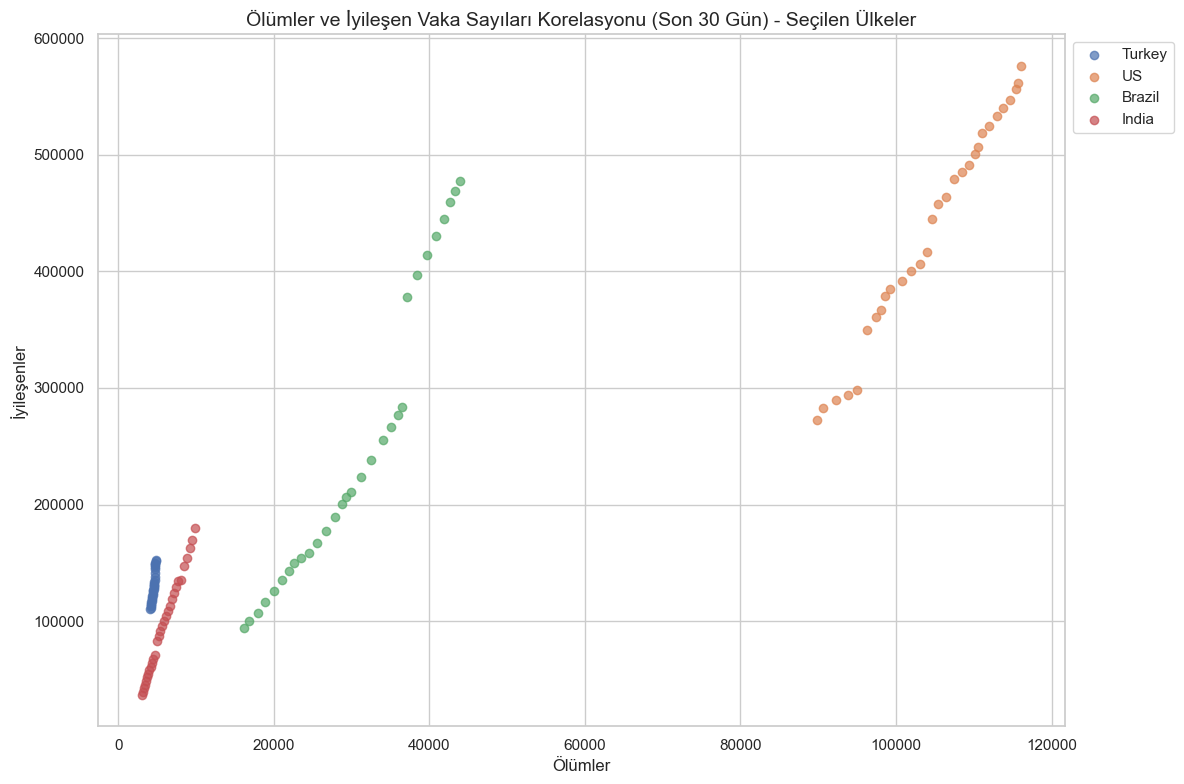

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri dosyalarının yolları
base_url = "../data/covid-19/"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"

# Verileri okuma
deaths_df = pd.read_csv(deaths_dataset_url)
recovered_df = pd.read_csv(recovered_dataset_url)

# Ülkelere göre gruplama ve toplulaştırma (tarihsel verilerin toplulaştırılması)
deaths_df = deaths_df.groupby("Country/Region").sum(numeric_only=True).drop(columns=['Lat', 'Long'])
recovered_df = recovered_df.groupby("Country/Region").sum(numeric_only=True).drop(columns=['Lat', 'Long'])

# Transpose işlemi ile tarihleri satır haline getirme
deaths_df = deaths_df.T
recovered_df = recovered_df.T

# Tarihleri datetime formatına çevirme
deaths_df.index = pd.to_datetime(deaths_df.index)
recovered_df.index = pd.to_datetime(recovered_df.index)

# Son 30 günün verisini alalım
date_range = pd.date_range(end=deaths_df.index[-1], periods=30)
#pd.date_range: Pandas'taki date_range() fonksiyonu, belirli bir tarih aralığı oluşturmak için kullanılır.
#end=deaths_df.index[-1]: Bu parametre, veri setinin son tarihini belirtir. Yani, son verinin tarihi ile işlem yapacağız.
#periods=30: Son 30 günü almayı istiyoruz, bu yüzden 30 günlük bir aralık tanımlıyoruz.



# Son 30 günün verilerini almak
deaths_last_30 = deaths_df.loc[date_range]
recovered_last_30 = recovered_df.loc[date_range]

# Analiz etmek istediğimiz ülkeleri belirleyelim
countries_of_interest = ['Turkey', 'US', 'Brazil', 'India']

# Belli başlı ülkeler için veri almak
deaths_selected_countries = deaths_last_30[countries_of_interest]
recovered_selected_countries = recovered_last_30[countries_of_interest]

# **Korelasyon Hesaplama**: Seçilen ülkeler için ölümler ile iyileşenler arasındaki korelasyonu hesaplıyoruz.
correlation = deaths_selected_countries.corrwith(recovered_selected_countries)

# Korelasyon değerlerini ekrana yazdırma
print("Korelasyon Değerleri:")
print(correlation)

# **Korelasyon Grafiği**: Scatter Plot (Dağılım Grafiği) sadece seçilen ülkeler için
plt.figure(figsize=(12, 8))

# Scatter plot - her ülke için ölüm ve iyileşen vaka sayısını çizelim
for country in countries_of_interest:
    plt.scatter(deaths_selected_countries[country], recovered_selected_countries[country], label=country, alpha=0.7)

# Başlık ve etiketler
plt.title('Ölümler ve İyileşen Vaka Sayıları Korelasyonu (Son 30 Gün) - Seçilen Ülkeler', fontsize=14)
plt.xlabel('Ölümler', fontsize=12)
plt.ylabel('İyileşenler', fontsize=12)

# Grafik düzenlemeleri
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


Eğer noktalar genellikle bir doğruyu takip ediyorsa, ölümler ve iyileşenler arasındaki ilişki güçlüdür.

Noktalar düzensizse, aralarındaki ilişki zayıftır veya yoktur.

Recoveries (İyileşen Vaka Sayıları) Karşılaştırması:

Bu görevde, iyileşen vaka sayılarının zaman içindeki değişimini ve ülkelere göre karşılaştırmalar yapmayı amaçlıyoruz.

C:\Users\user\AppData\Local\Temp\ipykernel_16232\3406713040.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_df.index = pd.to_datetime(recovered_df.index)


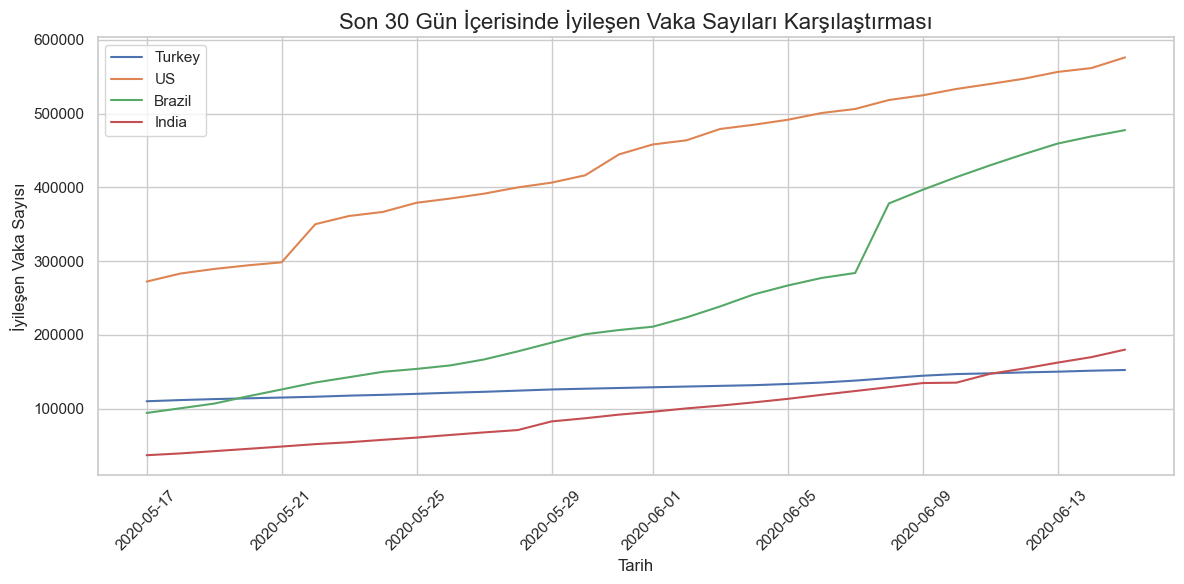

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükleme
recovered_df = pd.read_csv('../data/covid-19/time_series_covid19_recovered_global.csv')

# Veriyi uygun formatta işleme (Tarihleri satır yapma, ülkeleri sütun yapma)
recovered_df = recovered_df.drop(columns=['Province/State', 'Lat', 'Long'])  # Lat ve Long'ı kaldırıyoruz
recovered_df = recovered_df.groupby("Country/Region").sum()  # Ülkelere göre grupla ve toplulaştır
recovered_df = recovered_df.T  # Tarihleri satır yap

# Tarihlerin formatını datetime formatına dönüştürme
recovered_df.index = pd.to_datetime(recovered_df.index)

# Son 30 günün verilerini almak
date_range = pd.date_range(end=recovered_df.index[-1], periods=30)
recovered_last_30 = recovered_df.loc[date_range]

# Karşılaştırmak istediğimiz ülkeler
countries_of_interest = ['Turkey', 'US', 'Brazil','India']

# İyileşen vakaların seçilen ülkeler için verisini alma
recovered_selected_countries = recovered_last_30[countries_of_interest]

# Grafik çizimi
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    plt.plot(recovered_selected_countries.index, recovered_selected_countries[country], label=country)
    #plot içindeki parametreler şu için yarar : 
    # recovered_selected_countries.index: X ekseni için tarihleri alır.
    # recovered_selected_countries[country]: Y ekseni için seçilen ülkenin iyileşen vaka sayılarını alır.
    # label=country: Her ülke için etiket ekler.

# Başlık ve etiketler
plt.title('Son 30 Gün İçerisinde İyileşen Vaka Sayıları Karşılaştırması', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('İyileşen Vaka Sayısı', fontsize=12)

# Grafik düzenlemeleri ve gösterme
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Outlier (anomali) tespiti,
 verilerin normal dağılımdan sapmalarını ve uç değerlerini tanımlamak için çok önemli bir analiz yöntemidir. Pandas ve matplotlib/seaborn ile bu tip analizleri çok rahat yapabiliriz. Anomalilerin tespiti, özellikle zaman serisi verilerinde (COVID-19 gibi) büyük önem taşır çünkü bu tip verilerde, anomali bir olağanüstü durumu (örneğin bir anda patlayan vaka sayıları veya iyileşen insan sayıları) gösterebilir.

Anomali Tespiti Yöntemleri
1. Z-Score Yöntemi
Z-score, bir verinin ortalamadan ne kadar uzaklaştığını gösteren bir ölçüdür. Genellikle |Z| > 3 olan değerler anomali olarak kabul edilir.

2. IQR Yöntemi
IQR, veri setindeki verilerin orta yüzde 50'lik dilimini kapsar. 1. çeyrek (Q1) ve 3. çeyrek (Q3) arasındaki fark IQR olarak tanımlanır. Veriler Q1 - 1.5 * IQR'den küçük veya Q3 + 1.5 * IQR'den büyük olduğunda anomali olarak kabul edilir.

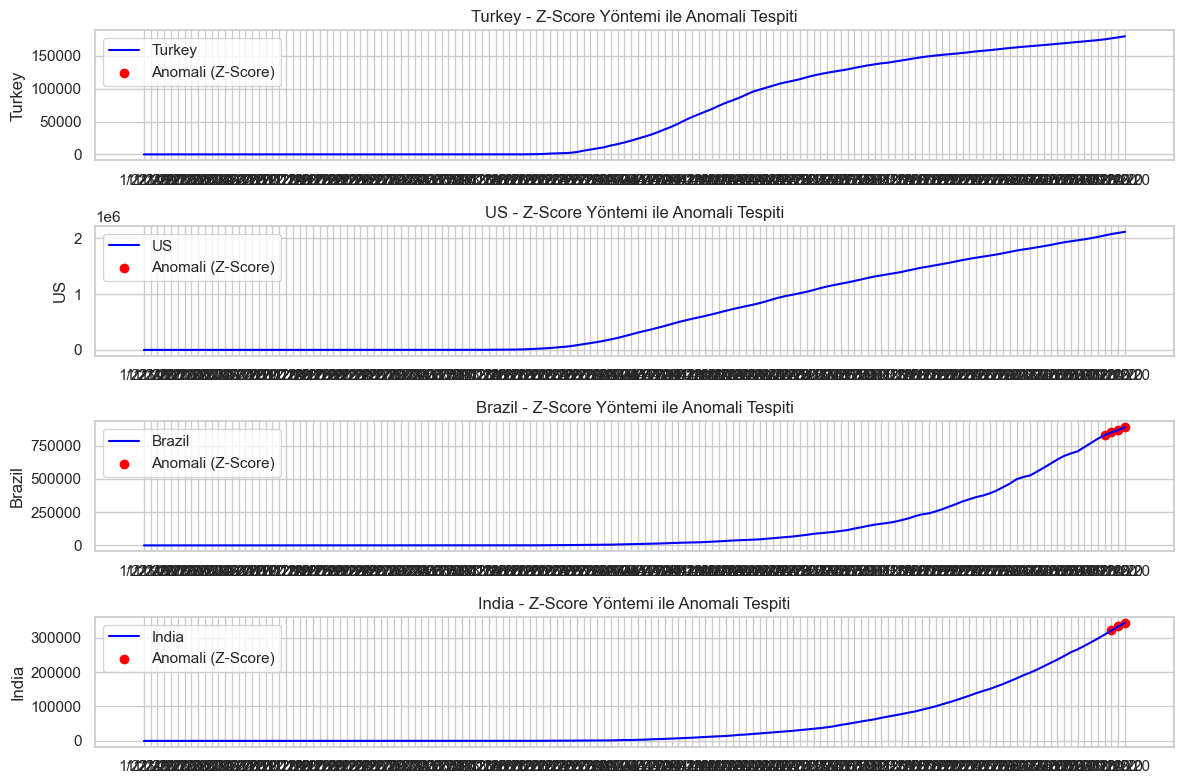

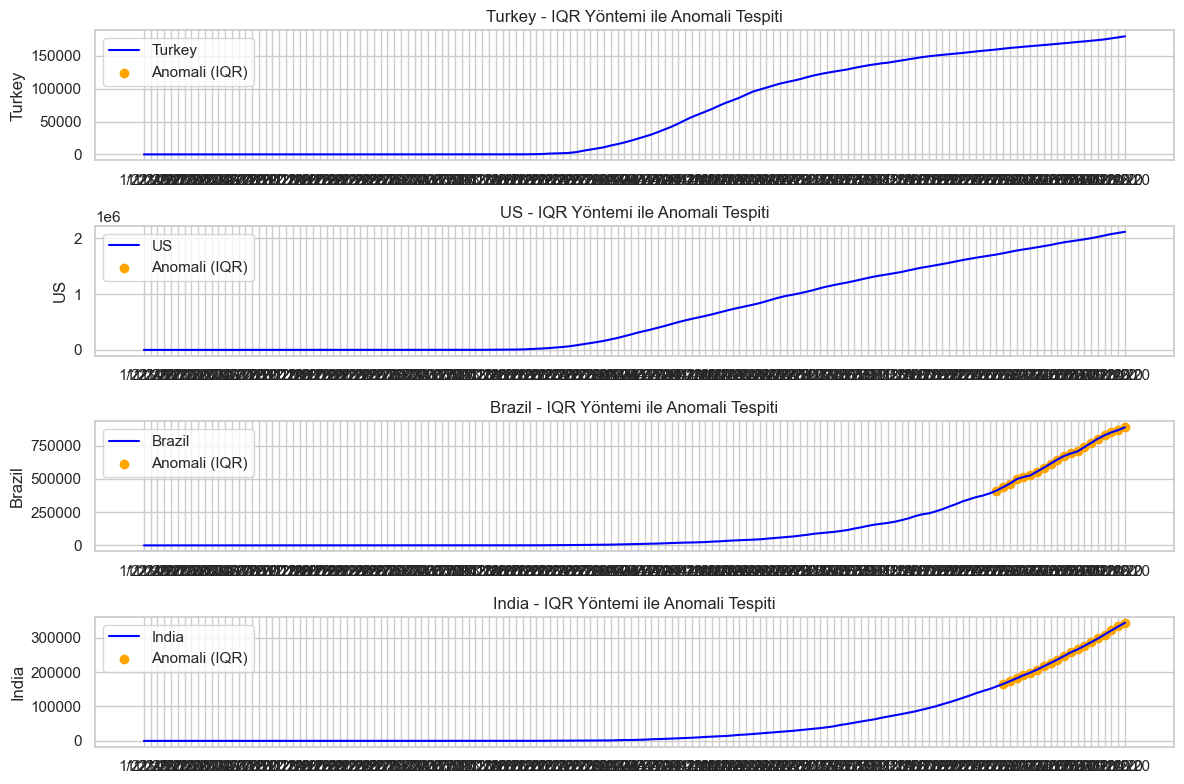

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Veriyi yükleme
confirmed_df = pd.read_csv('../data/covid-19/time_series_covid19_confirmed_global.csv')

# Veriyi uygun formatta işleme (Tarihleri satır yapma, ülkeleri sütun yapma)
confirmed_df = confirmed_df.drop(columns=['Province/State', 'Lat', 'Long'])  # Veriden gereksiz sütunları kaldırıyoruz
confirmed_df = confirmed_df.groupby("Country/Region").sum()  # Ülkelere göre gruplama yapıyoruz
confirmed_df = confirmed_df.T  # Tarihleri satır yapıyoruz (Zaman serisi analizi için)

# Z-Score ile Anomali Tespiti
countries_of_interest = ['Turkey', 'US', 'Brazil','India']  # İncelemek istediğimiz ülkeleri seçiyoruz
selected_data = confirmed_df[countries_of_interest]  # İlgili ülkeleri seçiyoruz

# Z-Score hesaplama
z_scores = np.abs(stats.zscore(selected_data))  # Her ülkenin verisi için Z-Score hesaplıyoruz

# Z-Score ile anomali tespiti (Z-Score değeri 3'ten büyük olanları anomali kabul ediyoruz)
outliers_z = (z_scores > 3)

# IQR Yöntemi ile Anomali Tespiti
Q1 = selected_data.quantile(0.25)  # İlk çeyrek (Q1)
Q3 = selected_data.quantile(0.75)  # Üçüncü çeyrek (Q3)
IQR = Q3 - Q1  # IQR hesaplama
outliers_iqr = (selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 + 1.5 * IQR))  # Anomalileri tespit etme

# Z-Score yöntemi ile anomali tespitini görselleştirelim
plt.figure(figsize=(12, 8))
for i, country in enumerate(countries_of_interest):
    plt.subplot(len(countries_of_interest), 1, i+1)  # Her ülke için ayrı bir grafik oluşturuyoruz
    sns.lineplot(data=selected_data[country], label=country, color='blue')  # Zaman serisini çiziyoruz
    plt.scatter(selected_data.index[outliers_z[:, i]], selected_data[country].iloc[outliers_z[:, i]], color='red', label='Anomali (Z-Score)')  # Anomali noktalarını kırmızı ile gösteriyoruz
    plt.title(f'{country} - Z-Score Yöntemi ile Anomali Tespiti')
    plt.legend()  # Efsane başlık ve açıklama ekliyoruz

plt.tight_layout()  # Grafiklerin düzenini ayarlıyoruz
plt.show()  # Grafikleri gösteriyoruz

# IQR yöntemi ile anomali tespitini görselleştirelim
plt.figure(figsize=(12, 8))
for i, country in enumerate(countries_of_interest):
    plt.subplot(len(countries_of_interest), 1, i+1)  # Her ülke için bir alt grafik oluşturuyoruz
    sns.lineplot(data=selected_data[country], label=country, color='blue')  # Zaman serisini çiziyoruz
    
    # IQR maskesini doğru kullanma
    outliers_iqr_mask = outliers_iqr[country]
    
    # IQR ile anomali tespitini loc kullanarak çizme
    plt.scatter(selected_data.index[outliers_iqr_mask].to_list(), selected_data[country].loc[outliers_iqr_mask].to_list(), color='orange', label='Anomali (IQR)')  # IQR ile anomali noktalarını turuncu ile gösteriyoruz
    plt.title(f'{country} - IQR Yöntemi ile Anomali Tespiti')
    plt.legend()  # Başlık ve açıklama ekliyoruz

plt.tight_layout()  # Grafik düzenini ayarlıyoruz
plt.show()  # Grafikleri gösteriyoruz


Z-Score Yöntemi:

Z-score hesaplanarak, 3'ten büyük olan z-skorları kırmızı renk ile işaretlendi. Bu, her bir verinin ortalamadan ne kadar uzaklaştığını gösterir.

Z-Score yöntemi, normal dağılımdan büyük sapmaları belirlemek için kullanılır.

IQR Yöntemi:

IQR hesaplanarak, Q1 - 1.5 * IQR ve Q3 + 1.5 * IQR dışındaki değerler turuncu renkte işaretlendi. Bu, verilerin normal aralık dışındaki noktalarını belirler.

IQR, verinin merkezinin etrafındaki bölgeyi belirler ve uç noktalardaki anormallikleri tespit eder.